# La distribución de *** <font color='red'>Bernoulli (o dicotómica)</font> *** es un modelo teórico utilizado para representar una variable aleatoria discreta la cual solo puede resultar en dos sucesos mutuamente excluyentes.

**puede tomar dos valores: **

Evento = 1

No Evento =2

***se asume que las variables son independientes***

<font color='blue'>Pros:</font>
1. sencillo de implementar
2. rápido, insume pocos recursos
3. trabaja bien con datasets pequeños
4. trabaja bien con múltiples dimensiones

<font color='red'>Contras</font>
1. requiere eliminar las features correlacionadas
2. la "frecuencia 0": si en el **test** se encuentran valores NO hallados en el **x_train**, le asigna cero probabilidad. Esto se resuelve aplicando el ***suavizado de Laplace***: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('diabetes.csv')
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**las variables NO están altamente correlacionadas**

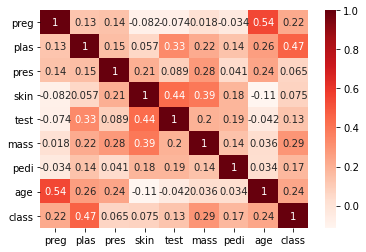

In [3]:
sb.heatmap(data.corr(), annot=True, cmap = plt.cm.Reds)

**aplico un filtro para ver las features que tiene una correlación mayor**

no tengo ninguna variable con más del 50% de correlación con la variable dependientes: class

In [4]:
base = 0.4
corr = data.corr()
corr_target = abs(corr['class'])
mayores = corr_target[(corr_target > base)]
print(mayores)
del base, corr, corr_target, mayores

plas     0.466581
class    1.000000
Name: class, dtype: float64


**analizo los p-values de cada feature**

skin, test, age poseen p-values > 0.05

In [15]:
pd.options.display.float_format = '{:,.3f}'.format
#cargo los datos
x = data[['preg','plas','pres','skin','test','mass','pedi','age']]
y = data['class']
#los estandarizo:
scaler = StandardScaler()
x = scaler.fit_transform(x)

x1 = sm.add_constant(x)
modelo = sm.OLS(y, x1).fit()
res = pd.DataFrame(modelo.pvalues, columns=['p-values'])
res.sort_values('p-values', ascending=False)

,p-values
x4,0.890
x5,0.229
x8,0.091
x3,0.004
x7,0.001
x1,0.000
x6,0.000
x2,0.000
const,0.000


**tiro un modelo para evaluar el R2 y demás valores

In [16]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     41.29
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           7.36e-55
Time:                        18:55:02   Log-Likelihood:                -381.91
No. Observations:                 768   AIC:                             781.8
Df Residuals:                     759   BIC:                             823.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3490      0.014     24.164      0.0

**quito las features con p-value > 0.05 y hago otro summary**

In [7]:
data_filt = data.drop(['skin', 'test', 'age', 'class'], axis=1)
data_filt.head(5)

,preg,plas,pres,mass,pedi
0,6,148,72,33.600,0.627
1,1,85,66,26.600,0.351
2,8,183,64,23.300,0.672
3,1,89,66,28.100,0.167
4,0,137,40,43.100,2.288


**en esto modelo NO tengo los p-values > 0.05**
1. los R empeoran, aunque el Adj. R2 se penaliza 5 puntos menos.
2. aumenta el F-statistic
3. la curtosis y el durbin-watson están casi iguales


In [8]:
x = data_filt

scaler = StandardScaler()
x = scaler.fit_transform(x)

x1 = sm.add_constant(x)
modelo = sm.OLS(y, x1).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  class   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     64.92
Date:                Tue, 08 Sep 2020   Prob (F-statistic):           1.76e-56
Time:                        18:46:38   Log-Likelihood:                -384.39
No. Observations:                 768   AIC:                             780.8
Df Residuals:                     762   BIC:                             808.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3490      0.014     24.134      0.000       0.321       0.377
x1             0.0869      0.015      5.898      0.000       0.058       0.116
x2             0.1885      0.015     12.482      0.000       0.159       0.218
x3            -0.0404      0.015     -2.648      0.008      -0.070      -0.010
x4             0.1010      0.015      6.539      0.000       0.071       0.131
x5             0.0473      0.015      3.218      0.001       0.018       0.076
==============================================================================
Omnibus:                       39.537   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.027
Skew:                           0.416   Prob(JB):                     1.11e-07
Kurtosis:                       2.445   Cond. No.                         1.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**los coeficientes de variarión son altos**

In [9]:
m = data_filt.mean()
s = data_filt.std()
print("coef. de variación:\n", s/m)

coef. de variación:
 preg   0.876
plas   0.264
pres   0.280
mass   0.246
pedi   0.702
dtype: float64


# <font color='red'>GaussianNB</font>

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.25)

In [11]:
gauss = GaussianNB()
gauss.fit(x_train, y_train)

GaussianNB()

In [12]:
y_pred = gauss.predict(x_test)

In [13]:
print("R2 - train: ", gauss.score(x_train, y_train))
print("R2 - test : ", gauss.score(x_test, y_test))

R2 - train:  0.7777777777777778
R2 - test :  0.765625


In [14]:
cm = metrics.confusion_matrix
print("el R2 con 'metrics': ", metrics.accuracy_score(y_test, y_pred))
print("precission: ", metrics.precision_score(y_test, y_pred))
print("recall    : ", metrics.recall_score(y_test, y_pred))
print("f1        : ", metrics.f1_score(y_test, y_pred))
print("confusion_matrix:\n ", cm(y_test, y_pred))

el R2 con 'metrics':  0.765625
precission:  0.6363636363636364
recall    :  0.5833333333333334
f1        :  0.6086956521739131
confusion_matrix:
  [[112  20]
 [ 25  35]]
